<img src="https://lh3.google.com/u/0/d/139J1S3vUM-ToCSZgGeZciZhShC1tY4Jo=w1366-h626-iv1">

In [3]:
#@title Montar drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
#@title Imports
import numpy as np
import os
import cv2 as cv
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import gc
import tensorflow as tf

# Tratamiento de datos

In [5]:
#@title Leemos las rutas de las imagenes (solo voy a leer 10k porque si no se reinicia el colab)
path_classes = '/content/drive/My Drive/Proyecto IA2/data/'
classes_names = ['Parasitized', 'Uninfected']
print(classes_names)
array_imgs = []
array_y = []
cont = 0

for i in range(0,len(classes_names)):
  for x in (np.array(os.listdir(path_classes + classes_names[i]))):
    if cont < 5000:
      cont += 1
      array_imgs = np.append(array_imgs,[ classes_names[i] + "/" + x]) #Se agrega la ruta de cada imagen a leer
    else:
      cont = 0
      break
        
print (array_imgs.shape) #se imprime la cantidad de rutas de las imagenes a usar

['Parasitized', 'Uninfected']


FileNotFoundError: ignored

In [ ]:
#@title Se leen las imagenes y aplicamos resize
ima = []
Y = []
for img_path in tqdm(array_imgs):
  filename = path_classes + img_path
  img =cv.cvtColor( cv.imread(path_classes+img_path) , cv.COLOR_BGR2RGB ) #leemos la imagen
  holi = cv.resize(img,(224,224)) #se le aplica resize

  ima.append(holi) #se agrega la imagen en ima
  
  if img_path.split('/')[0] == 'Parasitized':
    Y.append(0)  #Se agrega la clase de la imagen en Y
  elif img_path.split('/')[0] == 'Uninfected':
    Y.append(1)  #Se agrega la clase de la imagen en Y

In [6]:
#@title Apilamos los valores
x = np.array(ima) #Se apila los valores de ima
y = np.array(Y) #Se apila los valores de Y

NameError: ignored

In [ ]:
#@title Guardamos los x y y para no tener que volver hacer lo anterior
np.save('/content/drive/My Drive/Proyecto IA2/numpys/x10',x)
np.save('/content/drive/My Drive/Proyecto IA2/numpys/y10',y)

In [ ]:
#@title Cargamos el archivo X ya creado con las imagenes
x_load = np.load('/content/drive/My Drive/Proyecto IA2/numpys/x10.npy')

In [ ]:
#@title cargamos los Y ya creados
y_load = np.load('/content/drive/My Drive/Proyecto IA2/numpys/y10.npy')

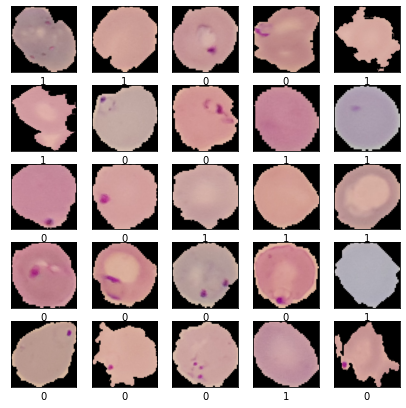

In [ ]:
#@title Imprimimos 25 imagenes aleatorias del dataset
plt.figure(figsize=(7,7))
for i in range(25):
  random = np.random.randint(0,9974)
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_load[(i+random)],cmap='gray')
  plt.xlabel(y_load[(i+random)])

In [ ]:
#@title imprimimos las dimensiones de los x y las y
print(x_load.shape) #imprimimos las dimensiones de x
print(y_load.shape) #imprimimos las dimensiones de y

(10000, 224, 224, 3)
(10000,)


In [ ]:
#@title Realizamos la particion de datos en train y test
X_train, X_test, y_train, y_test = train_test_split(x_load, y_load, test_size=0.1)

In [ ]:
#@title liberamos ram 
del x_load
del y_load
gc.collect()

28

In [ ]:
#@title imprimimos las dimensiones del train y test
print(X_train.shape, y_train.shape) 
print(X_test.shape, y_test.shape)

(9000, 224, 224, 3) (9000,)
(1000, 224, 224, 3) (1000,)


In [ ]:
#@title Realizamos el tratamiento de datos
X_train = X_train.reshape([-1, 224, 224, 3])#Agrega un indice que exige keras (-1), 224x224, por tres canales
X_test = X_test.reshape([-1, 224, 224, 3])

X_train = X_train.astype('float32')#Lo pasamos a flotantes
X_test = X_test.astype('float32')

X_train /= 255 #Escala entre 0-1
X_test /= 255



In [ ]:
#@title imprimimos las dimensiones del train y test
print(X_train.shape, y_train.shape) 
print(X_test.shape, y_test.shape)

(9000, 224, 224, 3) (9000,)
(1000, 224, 224, 3) (1000,)


# Modelo VGG16

In [ ]:
#@title Cargamos la VGG16 con sus pesos
model_A = tf.keras.applications.VGG16(weights='imagenet')

In [ ]:
#@title Adaptamos la VGG16 a nuestro proyecto
output = model_A.layers[-3].output
inicializador = tf.keras.initializers.lecun_uniform(seed=None)

x = tf.keras.layers.Dense(100, activation='relu')(output)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(model_A.input, x)

In [ ]:
#@title Imprimimos la estructura del modelo
model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
#@title Preparamos el compilador
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#@title Entrenamos (actualmente 1 epoch)
history = model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test)) #hacemos el train y test

282/282 [==============================] - 232s 824ms/step - loss: 0.0139 - accuracy: 0.9954 - val_loss: 0.1710 - val_accuracy: 0.9630


In [ ]:
#@title Para guardar el modelo
tf.keras.models.save_model(model,'/content/drive/My Drive/Proyecto IA2/Models/vgg16_99_97.h5') #Guardamos el modelo

In [ ]:
#@title Para cargar un modelo
model = tf.keras.models.load_model('/content/drive/My Drive/Proyecto IA2/Models/vgg16_98_96.h5')

Clasificacion:  [[0.99999964]]


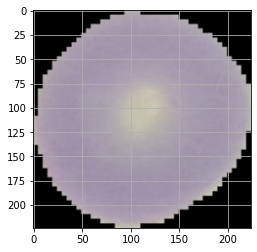

In [ ]:
#@title Tomamos una imagen para probar la red(cerca a 1 = Uninfected, cerca a 0 = parasitized)
filename_foto = "/content/drive/My Drive/Proyecto IA2/data/Uninfected/C241NThinF_IMG_20151207_124643_cell_169.png"
img_test = cv.cvtColor(cv.resize(cv.imread(filename_foto),(224,224)),cv.COLOR_BGR2RGB)
plt.imshow(img_test), plt.grid();

img_test = img_test.reshape([-1,224,224,3])
img_test = img_test.astype('float32')
img_test /= 255 #Se le realiza el mismo tratamiento de datos

print('Clasificacion: ',model.predict(img_test)) #Da un porcentaje de la imagen en cada clase, donde palma es la tercera clase

## Activaciones

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
red_neural_conv1 = tf.keras.Model(inputs=model.input, outputs=model.get_layer('block1_conv1').output)

red_neural_conv2 = tf.keras.Model(inputs=model.input, outputs=model.get_layer('block2_conv1').output)

red_neural_conv3 = tf.keras.Model(inputs=model.input, outputs=model.get_layer('block3_conv1').output)

red_neural_conv4 = tf.keras.Model(inputs=model.input, outputs=model.get_layer('block4_conv1').output)

In [ ]:
features_conv1 = red_neural_conv1.predict(img_test)

features_conv2 = red_neural_conv2.predict(img_test)

features_conv3 = red_neural_conv3.predict(img_test)

features_conv4 = red_neural_conv4.predict(img_test)


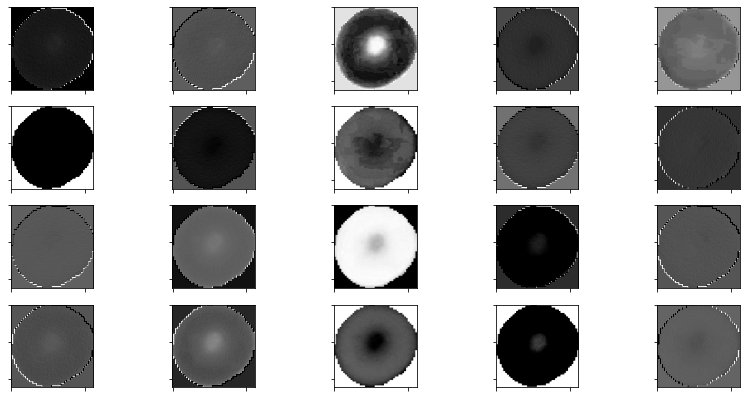

In [ ]:
perm = np.random.permutation(range(features_conv1.shape[3]))[0:20]

fig = plt.figure(figsize=(14,7))
for i in range(20):
    ax=fig.add_subplot(4,5,i+1)
    plt.imshow(features_conv1[0,:,:, perm[i]], interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

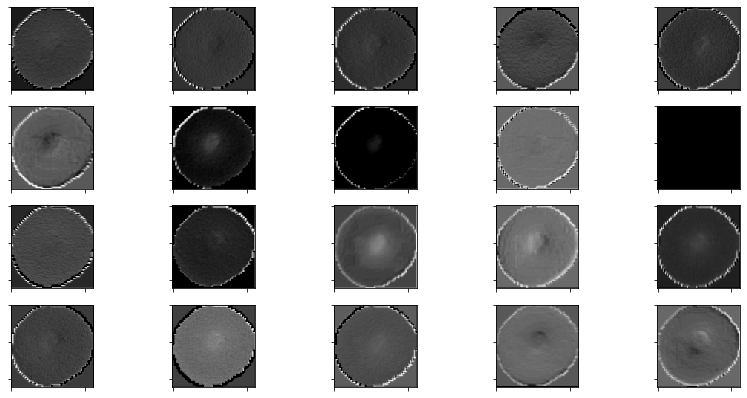

In [ ]:
perm = np.random.permutation(range(features_conv2.shape[3]))[0:20]

fig = plt.figure(figsize=(14,7))
for i in range(20):
    ax=fig.add_subplot(4,5,i+1)
    plt.imshow(features_conv2[0,:,:, perm[i]], interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

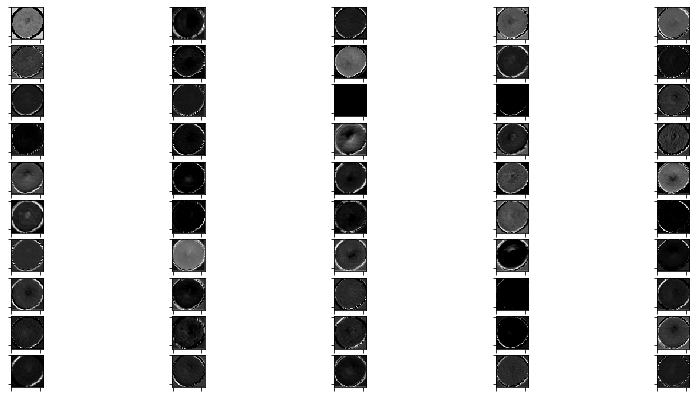

In [ ]:
perm = np.random.permutation(range(features_conv3.shape[3]))[0:50]

fig = plt.figure(figsize=(14,7))
for i in range(50):
    ax=fig.add_subplot(10,5,i+1)
    plt.imshow(features_conv3[0,:,:, perm[i]], interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

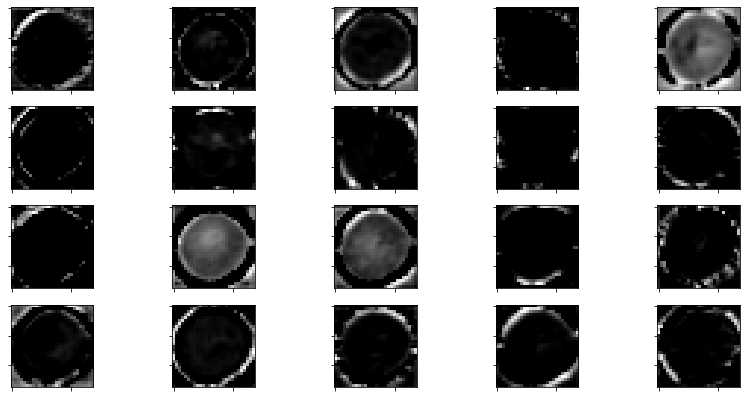

In [ ]:
perm = np.random.permutation(range(features_conv4.shape[3]))[0:20]

fig = plt.figure(figsize=(14,7))
for i in range(20):
    ax=fig.add_subplot(4,5,i+1)
    plt.imshow(features_conv4[0,:,:, perm[i]], interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

64 (3, 3, 3, 64)


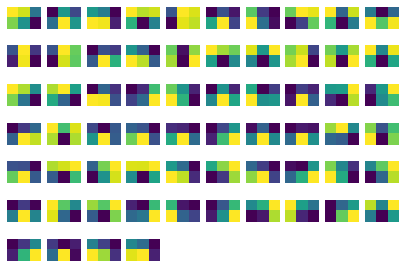

In [ ]:
w = model.get_weights()[0]
plt.figure(figsize=(7,7))
w = (w-np.min(w))/(np.max(w)-np.min(w))
# print(w)
print (w.shape[-1], w.shape)
for i in range(w.shape[-1]):
    plt.subplot(10,10,i+1)
    plt.imshow(w[:-1,:,0,i])
    plt.axis("off")

# Modelo ResNet50

In [ ]:
#@title Cargamos la ResNet50 con sus pesos
resnet =tf.keras.applications.ResNet50(weights='imagenet')

In [ ]:
#@title Adaptamos la ResNet50 a nuestro proyecto
output = resnet.layers[-3].output
inicializador = tf.keras.initializers.lecun_uniform(seed=None)

x = tf.keras.layers.Flatten()(output)
x = tf.keras.layers.Dense(100, activation='relu')(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(resnet.input, x)

In [ ]:
#@title Imprimimos la estructura del modelo
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
#@title Preparamos el compilador
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#@title Entrenamos (actualmente 1 epoch)
history = model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test)) #hacemos el train y test

In [ ]:
#@title Para guardar el modelo
tf.keras.models.save_model(model,'/content/drive/My Drive/Proyecto IA2/Models/ResNet_99_97.h5') #Guardamos el modelo

Clasificacion:  [[1.]]


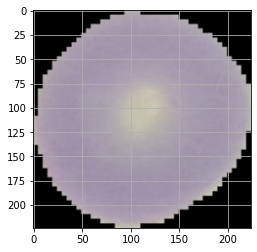

In [ ]:
#@title Tomamos una imagen para probar la red(cerca a 1 = Uninfected, cerca a 0 = parasitized)
filename_foto = "/content/drive/My Drive/Proyecto IA2/data/Uninfected/C241NThinF_IMG_20151207_124643_cell_169.png"
img_test = cv.cvtColor(cv.resize(cv.imread(filename_foto),(224,224)),cv.COLOR_BGR2RGB)
plt.imshow(img_test), plt.grid();

img_test = img_test.reshape([-1,224,224,3])
img_test = img_test.astype('float32')
img_test /= 255 #Se le realiza el mismo tratamiento de datos

print('Clasificacion: ',model.predict(img_test)) #Da un porcentaje de la imagen en cada clase, donde palma es la tercera clase

## Activaciones ResNet

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
red_neural_conv1 = tf.keras.Model(inputs=model.input, outputs=model.get_layer('conv2_block1_1_conv').output)

red_neural_conv2 = tf.keras.Model(inputs=model.input, outputs=model.get_layer('conv2_block2_1_conv').output)

red_neural_conv3 = tf.keras.Model(inputs=model.input, outputs=model.get_layer('conv2_block3_1_conv').output)

red_neural_conv4 = tf.keras.Model(inputs=model.input, outputs=model.get_layer('conv3_block4_1_conv').output)

In [ ]:
features_conv1 = red_neural_conv1.predict(img_test)

features_conv2 = red_neural_conv2.predict(img_test)

features_conv3 = red_neural_conv3.predict(img_test)

features_conv4 = red_neural_conv4.predict(img_test)


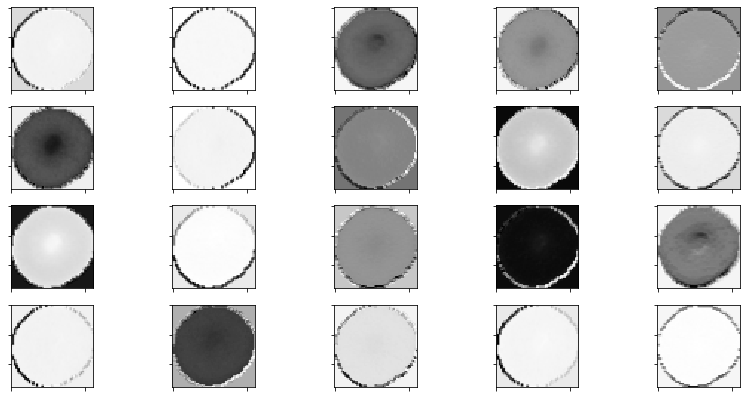

In [ ]:
perm = np.random.permutation(range(features_conv1.shape[3]))[0:20]

fig = plt.figure(figsize=(14,7))
for i in range(20):
    ax=fig.add_subplot(4,5,i+1)
    plt.imshow(features_conv1[0,:,:, perm[i]], interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

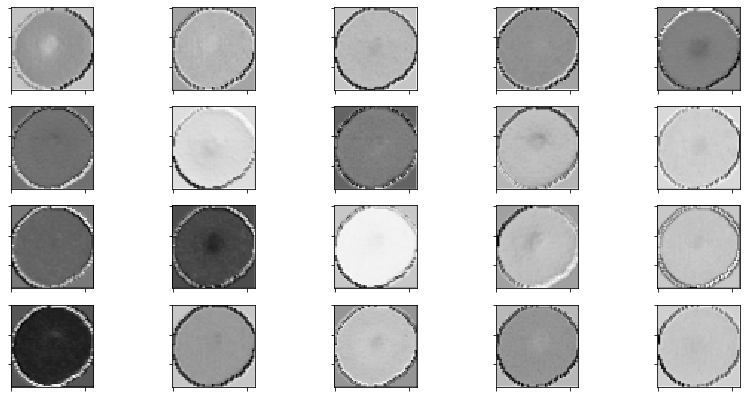

In [ ]:
perm = np.random.permutation(range(features_conv2.shape[3]))[0:20]

fig = plt.figure(figsize=(14,7))
for i in range(20):
    ax=fig.add_subplot(4,5,i+1)
    plt.imshow(features_conv2[0,:,:, perm[i]], interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

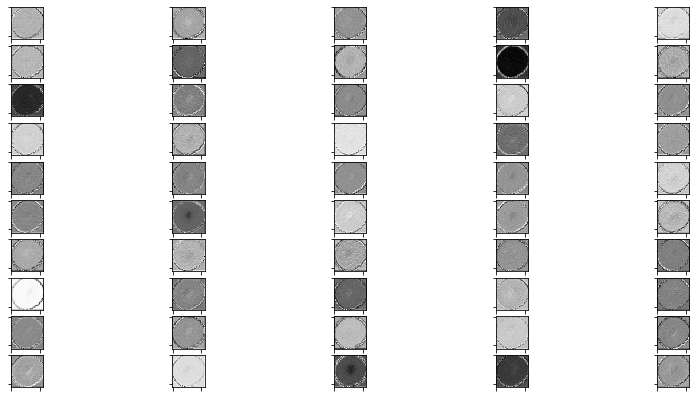

In [ ]:
perm = np.random.permutation(range(features_conv3.shape[3]))[0:50]

fig = plt.figure(figsize=(14,7))
for i in range(50):
    ax=fig.add_subplot(10,5,i+1)
    plt.imshow(features_conv3[0,:,:, perm[i]], interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

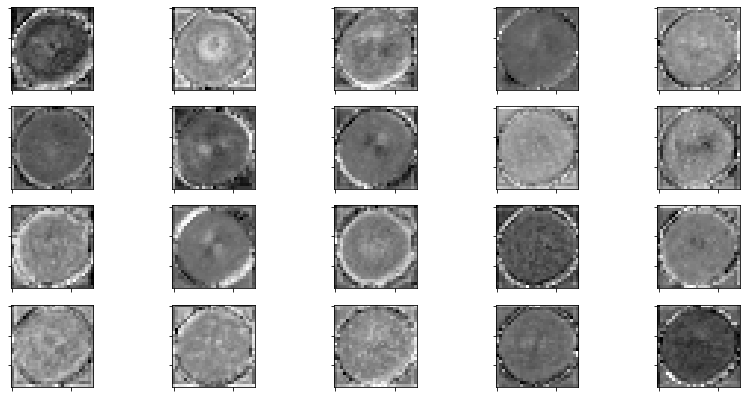

In [ ]:
perm = np.random.permutation(range(features_conv4.shape[3]))[0:20]

fig = plt.figure(figsize=(14,7))
for i in range(20):
    ax=fig.add_subplot(4,5,i+1)
    plt.imshow(features_conv4[0,:,:, perm[i]], interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

64 (7, 7, 3, 64)


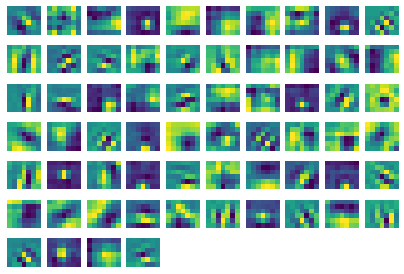

In [ ]:
w = model.get_weights()[0]
plt.figure(figsize=(7,7))
w = (w-np.min(w))/(np.max(w)-np.min(w))
# print(w)
print (w.shape[-1], w.shape)
for i in range(w.shape[-1]):
    plt.subplot(10,10,i+1)
    plt.imshow(w[:-1,:,0,i])
    plt.axis("off")

# Probar 

In [ ]:
#@title Cargar clasificadores
import os
from google.colab import files
vgg16 = tf.keras.models.load_model('/content/drive/My Drive/Proyecto IA2/Models/vgg16_99_97.h5')
vgg19 = tf.keras.models.load_model('/content/drive/My Drive/Proyecto IA2/Models/vgg19.h5')
resnet = tf.keras.models.load_model('/content/drive/My Drive/Proyecto IA2/Models/ResNet_99_97.h5')

Saving C33P1thinF_IMG_20150619_121503a_cell_159.png to C33P1thinF_IMG_20150619_121503a_cell_159.png
Saving C37BP2_thinF_IMG_20150620_131423a_cell_92.png to C37BP2_thinF_IMG_20150620_131423a_cell_92.png
Saving C37BP2_thinF_IMG_20150620_131423a_cell_93.png to C37BP2_thinF_IMG_20150620_131423a_cell_93.png
Saving C37BP2_thinF_IMG_20150620_131423a_cell_94.png to C37BP2_thinF_IMG_20150620_131423a_cell_94.png


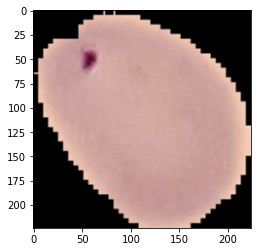

Nombre de la muestra: 	 C33P1thinF_IMG_20150619_121503a_cell_159.png
Ruta de la muestra: 	 /content/C33P1thinF_IMG_20150619_121503a_cell_159.png
Clasificacion VGG16: 		 [[0.]]  ->  Contagiado
Clasificacion VGG19: 		 [[0.]]  ->  Contagiado
Clasificacion ResNet50: 	 [[1.]]  ->  No contagiado


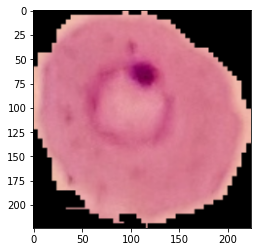

Nombre de la muestra: 	 C37BP2_thinF_IMG_20150620_131423a_cell_92.png
Ruta de la muestra: 	 /content/C37BP2_thinF_IMG_20150620_131423a_cell_92.png
Clasificacion VGG16: 		 [[0.]]  ->  Contagiado
Clasificacion VGG19: 		 [[0.]]  ->  Contagiado
Clasificacion ResNet50: 	 [[0.]]  ->  Contagiado


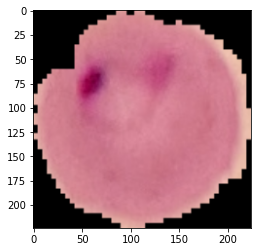

Nombre de la muestra: 	 C37BP2_thinF_IMG_20150620_131423a_cell_93.png
Ruta de la muestra: 	 /content/C37BP2_thinF_IMG_20150620_131423a_cell_93.png
Clasificacion VGG16: 		 [[0.]]  ->  Contagiado
Clasificacion VGG19: 		 [[0.]]  ->  Contagiado
Clasificacion ResNet50: 	 [[0.]]  ->  Contagiado


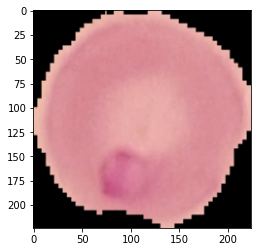

Nombre de la muestra: 	 C37BP2_thinF_IMG_20150620_131423a_cell_94.png
Ruta de la muestra: 	 /content/C37BP2_thinF_IMG_20150620_131423a_cell_94.png
Clasificacion VGG16: 		 [[0.]]  ->  Contagiado
Clasificacion VGG19: 		 [[0.]]  ->  Contagiado
Clasificacion ResNet50: 	 [[0.]]  ->  Contagiado


In [ ]:
#@title Analizar muestra
%matplotlib inline
uploaded = files.upload()

for n in uploaded.keys():
  filename_foto = os.getcwd()+"/"+n
  img_cvt = cv.cvtColor(cv.resize(cv.imread(filename_foto),(224,224)),cv.COLOR_BGR2RGB)
  plt.figure()
  plt.imshow(img_cvt)
  plt.show()

  img_cvt = img_cvt.reshape([-1,224,224,3])
  img_cvt = img_cvt.astype('float32')
  img_cvt /= 255 

  if np.rint(vgg16.predict(img_cvt)) == 0:
    clase_vgg = 'Contagiado'
  else:
    clase_vgg = 'No contagiado'

  if np.rint(vgg19.predict(img_cvt)) == 0:
    clase_vgg19 = 'Contagiado'
  else:
    clase_vgg19 = 'No contagiado'

  if np.rint(resnet.predict(img_cvt)) == 0:
    clase_resnet = 'Contagiado'
  else:
    clase_resnet = 'No contagiado'

  print('Nombre de la muestra: \t',n)
  print('Ruta de la muestra: \t',filename_foto)
  print('Clasificacion VGG16: \t\t',np.rint(vgg16.predict(img_cvt)),' -> ',clase_vgg)
  print('Clasificacion VGG19: \t\t',np.rint(vgg19.predict(img_cvt)),' -> ',clase_vgg19)
  print('Clasificacion ResNet50: \t',np.rint(resnet.predict(img_cvt)),' -> ',clase_resnet)